In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("../../game_data.csv")
df_raw

,Id,Weapon0,Weapon1
0,0,Sparks LRR,Romero
1,1,Winfield M1873 Talon,Caldwell Pax
2,2,Caldwell Pax,Caldwell Pax
3,3,Winfield M1873 Talon,Caldwell Pax
4,4,Caldwell Pax,Specter 1882 Bayonet
...,...,...,...
9995,9995,Lebel 1886,Specter 1882 Bayonet
9996,9996,Winfield M1873 Talon,Romero
9997,9997,Caldwell Pax,Lebel 1886
9998,9998,Sparks LRR,Sparks LRR


In [3]:
df_game_data = df_raw.reindex(df_raw.loc[:, "Id"]).drop("Id", axis=1)
df_game_data

,Weapon0,Weapon1
Id,,
0,Sparks LRR,Romero
1,Winfield M1873 Talon,Caldwell Pax
2,Caldwell Pax,Caldwell Pax
3,Winfield M1873 Talon,Caldwell Pax
4,Caldwell Pax,Specter 1882 Bayonet
...,...,...
9995,Lebel 1886,Specter 1882 Bayonet
9996,Winfield M1873 Talon,Romero
9997,Caldwell Pax,Lebel 1886


In [4]:
df_game_data.loc[:,:] = df_game_data.loc[df_game_data["Weapon0"]!=df_game_data["Weapon1"], :]
df_game_data

,Weapon0,Weapon1
Id,,
0,Sparks LRR,Romero
1,Winfield M1873 Talon,Caldwell Pax
2,NaN,NaN
3,Winfield M1873 Talon,Caldwell Pax
4,Caldwell Pax,Specter 1882 Bayonet
...,...,...
9995,Lebel 1886,Specter 1882 Bayonet
9996,Winfield M1873 Talon,Romero
9997,Caldwell Pax,Lebel 1886


In [14]:
df_plot_data = pd.DataFrame()
grp0 = df_game_data.groupby("Weapon0")
grp1 = df_game_data.groupby("Weapon1")
# print(grp0.sum())
# print(grp1.sum())
print(grp0.count())
print(grp1.count())
df_plot_data.loc[:, "Wins"] = grp0.count().loc[:, "Weapon1"]
df_plot_data.loc[:, "Games"] = grp0.count().loc[:, "Weapon1"] + grp1.count().loc[:, "Weapon0"]
df_plot_data.loc[:, "Winrate"] = df_plot_data.loc[:, "Wins"]/df_plot_data.loc[:, "Games"]
df_plot_data

                      Weapon1     1
Weapon0                            
Caldwell Pax             1565  1565
Lebel 1886               2200  2200
Romero                    240   240
Sparks LRR               1818  1818
Specter 1882 Bayonet      683   683
Winfield M1873 Talon     1816  1816
                      Weapon0     1
Weapon1                            
Caldwell Pax             1279  1279
Lebel 1886                370   370
Romero                   2586  2586
Sparks LRR                895   895
Specter 1882 Bayonet     2200  2200
Winfield M1873 Talon      992   992


,Wins,Games,Winrate
Weapon0,,,
Caldwell Pax,1565,2844,0.550281
Lebel 1886,2200,2570,0.856031
Romero,240,2826,0.084926
Sparks LRR,1818,2713,0.670107
Specter 1882 Bayonet,683,2883,0.236906
Winfield M1873 Talon,1816,2808,0.646724


In [15]:
df_plot_data["Winrate_deviation"] = abs(df_plot_data["Winrate"]-0.5)
reward = 3 - df_plot_data["Winrate_deviation"].sum()
reward, df_plot_data["Winrate_deviation"]

(1.5986887288957914,
 Weapon0
 Caldwell Pax            0.050281
 Lebel 1886              0.356031
 Romero                  0.415074
 Sparks LRR              0.170107
 Specter 1882 Bayonet    0.263094
 Winfield M1873 Talon    0.146724
 Name: Winrate_deviation, dtype: float64)

,Winrate
Weapon0,
Caldwell Pax,0.550281
Lebel 1886,0.856031
Romero,0.084926
Sparks LRR,0.670107
Specter 1882 Bayonet,0.236906
Winfield M1873 Talon,0.646724


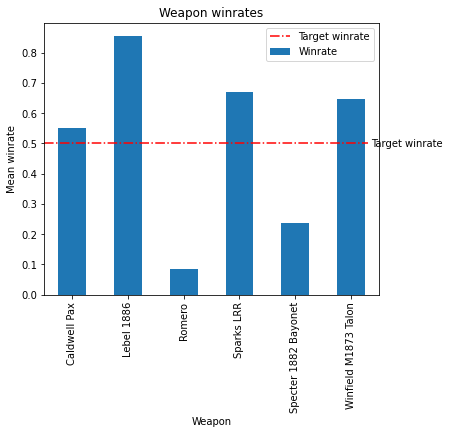

In [6]:
plot_data = df_plot_data.drop(["Wins", "Games"], axis=1)
plot_data.plot(kind='bar', title='Weapon winrates', ylabel='Mean winrate', xlabel='Weapon', figsize=(6, 5))
plt.hlines(0.5, -0.5, 5.3, color='red', label="Target winrate", linestyle="-.")
plt.text(5.35, 0.5, 'Target winrate ', ha='left', va='center')
plt.legend().get_texts()[1].set_text('Winrate')
plot_data

Caldwell Pax jest na ten moment poprawnie zbalansowany - jest około 50%. Należy nieco pogorszyć Lebel'a, Sparks'a i Winfield'a - są zbyt mocne. Polepszenia wymagają Romero i Specter, więc strzelby bliskiego zasięgu.

In [7]:
df_game_data.loc[:, "1"] = 1
df_cross_winrates = df_game_data.groupby(["Weapon0", "Weapon1"]).count()

weapons = ["Caldwell Pax", "Lebel 1886", "Romero", "Sparks LRR",
           "Specter 1882 Bayonet", "Winfield M1873 Talon"]
df_winrate_matrix = pd.DataFrame(columns = weapons, index = weapons)
for weapon1 in weapons:
    for weapon2 in weapons:
        if weapon1 != weapon2:
            wins_with_w1 = df_cross_winrates.loc[(weapon1, weapon2), "1"]
            wins_with_w2 = df_cross_winrates.loc[(weapon2, weapon1), "1"]
            df_winrate_matrix.at[weapon1, weapon2] = wins_with_w1/(wins_with_w1+wins_with_w2)
        else:
            df_winrate_matrix.at[weapon1, weapon2] = 0.5

df_winrate_matrix = df_winrate_matrix.astype("float")
df_winrate_matrix

,Caldwell Pax,Lebel 1886,Romero,Sparks LRR,Specter 1882 Bayonet,Winfield M1873 Talon
Caldwell Pax,0.500000,0.178112,0.955473,0.361905,0.872146,0.310502
Lebel 1886,0.821888,0.500000,0.979487,0.666667,0.976143,0.837472
Romero,0.044527,0.020513,0.500000,0.133333,0.192616,0.022263
Sparks LRR,0.638095,0.333333,0.866667,0.500000,0.880716,0.666084
Specter 1882 Bayonet,0.127854,0.023857,0.807384,0.119284,0.500000,0.040201
Winfield M1873 Talon,0.689498,0.162528,0.977737,0.333916,0.959799,0.500000


<AxesSubplot:>

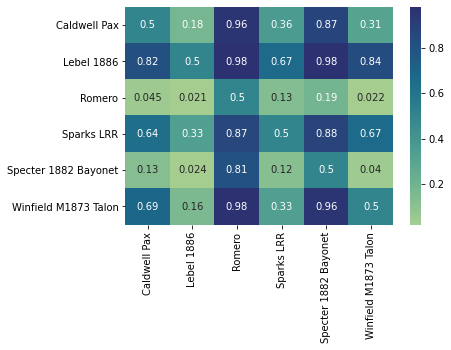

In [19]:
sns.heatmap(data = df_winrate_matrix, cmap=sns.color_palette("crest", as_cmap=True), annot=True)